<a href="https://colab.research.google.com/github/sachiii29/abc/blob/main/WQP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'finaldataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5433359%2F9016961%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T062835Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D54801f5dd1d5e212ac8e03fe506cafc016a8bd68857beea2e3ee9738de3472fdd53902cf1a7d874003407fe2e477c71ac92d1d302a0bc27763e160ea83ed3884792a5cd44261477251f81506e1736a6542cb4475692ef4921ed21031e423d0c18ac899477718485b20031e9a7dc5d792f273e751a4225bb8ba5518405f878eab5680697b8226a9699e93e678a504d51ff9e47c2d9238eaa8fcf5d0d67dd983d5e21a29390e18c69605f776ab118eee03bce0b77c13fa175b0f84ca3c0185b94d12d6cdb0764eb45d8dfa95b4a0480713f9ebc338cf0960b97cdf8de70c191b89767a84e7db48ee29344987dc6bbd8973f5a8c7bf99991dc4549377ef141f5288'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26884 bytes downloaded
Downloaded and uncompressed: finaldataset
Data source import complete.


In [34]:

import numpy as np # linear algebra
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/finaldataset/water_potability.csv


In [35]:
main_df = pd.read_csv("/kaggle/input/finaldataset/water_potability.csv")
df = main_df.copy()

In [36]:
# Getting top 5 row of the dataset

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [38]:
print(df.shape)

(499, 10)


In [39]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [40]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,429.000000,499.000000,499.000000,499.000000,383.000000,499.000000,499.000000,476.000000,499.000000,499.000000
mean,7.131780,198.333606,22081.486720,7.177670,329.774279,429.092578,14.187527,66.134515,3.994784,0.320641
std,1.691152,42.047004,8524.820362,1.751132,42.613868,81.399016,3.303162,16.596443,0.790076,0.467191
min,1.844538,47.432000,2552.962804,0.530351,180.206746,245.859632,5.315287,8.175876,1.943319,0.000000
25%,6.096180,173.366325,15775.207985,6.097542,307.182189,369.780311,11.881979,55.892854,3.471775,0.000000
50%,7.078659,199.588718,21218.702870,7.208946,329.695223,425.383420,14.154110,66.481145,3.991564,0.000000
75%,8.153210,224.698249,27390.220055,8.257946,355.790264,485.116512,16.517977,77.531504,4.520109,1.000000
max,13.175402,323.124000,52318.917300,13.127000,444.970552,695.369528,23.917601,112.622733,6.739000,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               429 non-null    float64
 1   Hardness         499 non-null    float64
 2   Solids           499 non-null    float64
 3   Chloramines      499 non-null    float64
 4   Sulfate          383 non-null    float64
 5   Conductivity     499 non-null    float64
 6   Organic_carbon   499 non-null    float64
 7   Trihalomethanes  476 non-null    float64
 8   Turbidity        499 non-null    float64
 9   Potability       499 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 39.1 KB


In [42]:
print(df.nunique())

ph                 429
Hardness           499
Solids             499
Chloramines        499
Sulfate            383
Conductivity       499
Organic_carbon     499
Trihalomethanes    476
Turbidity          499
Potability           2
dtype: int64


In [43]:
print(df.isnull().sum())

ph                  70
Hardness             0
Solids               0
Chloramines          0
Sulfate            116
Conductivity         0
Organic_carbon       0
Trihalomethanes     23
Turbidity            0
Potability           0
dtype: int64


In [44]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

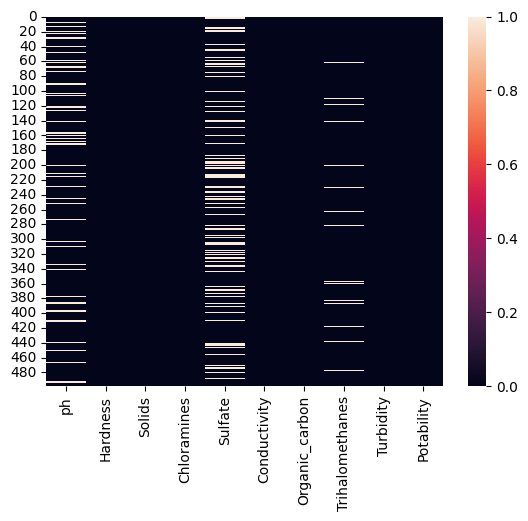

In [45]:
sns.heatmap(df.isnull())

<Axes: >

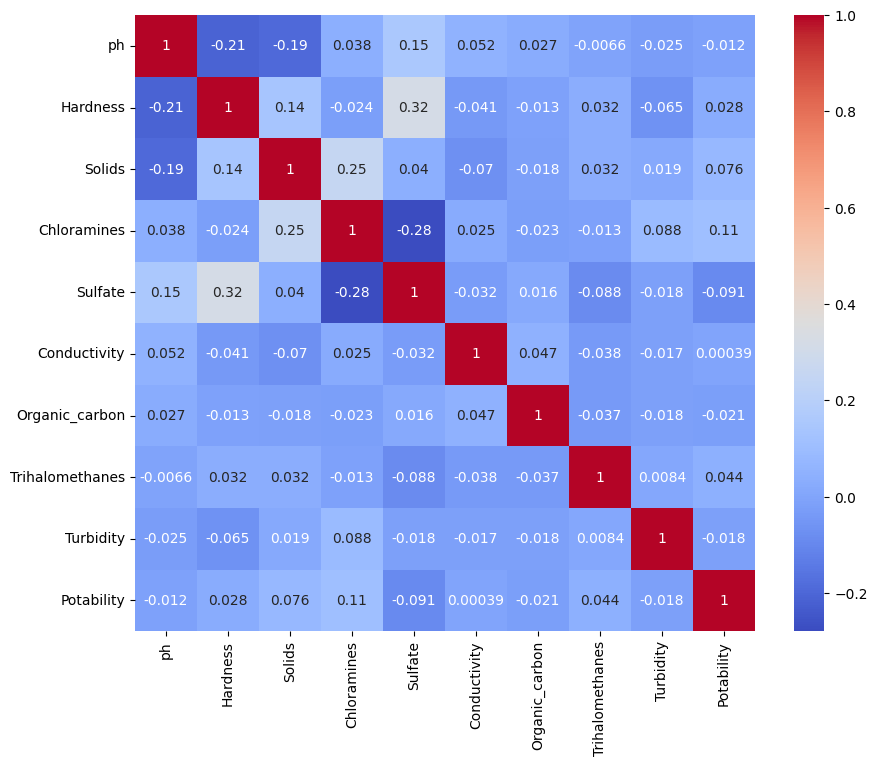

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [47]:

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Chloramines  Sulfate    0.279162
             Solids     0.250780
Hardness     ph         0.210108
ph           Solids     0.193078
             Sulfate    0.150727
Hardness     Solids     0.138808
dtype: float64

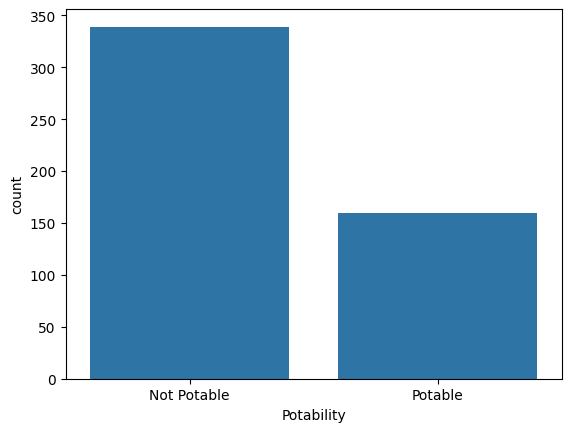

In [48]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [49]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

Potability
0    339
1    160
Name: count, dtype: int64


<Axes: xlabel='Potability', ylabel='ph'>

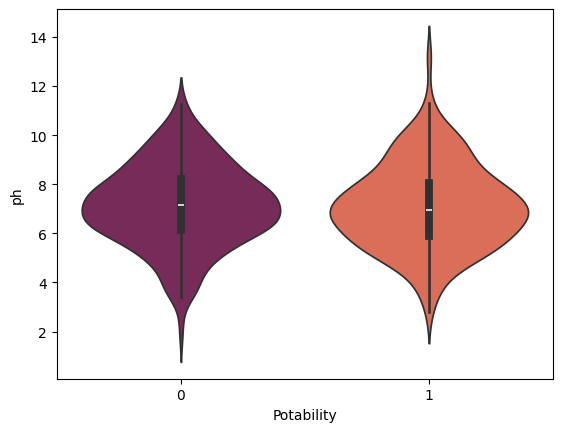

In [50]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

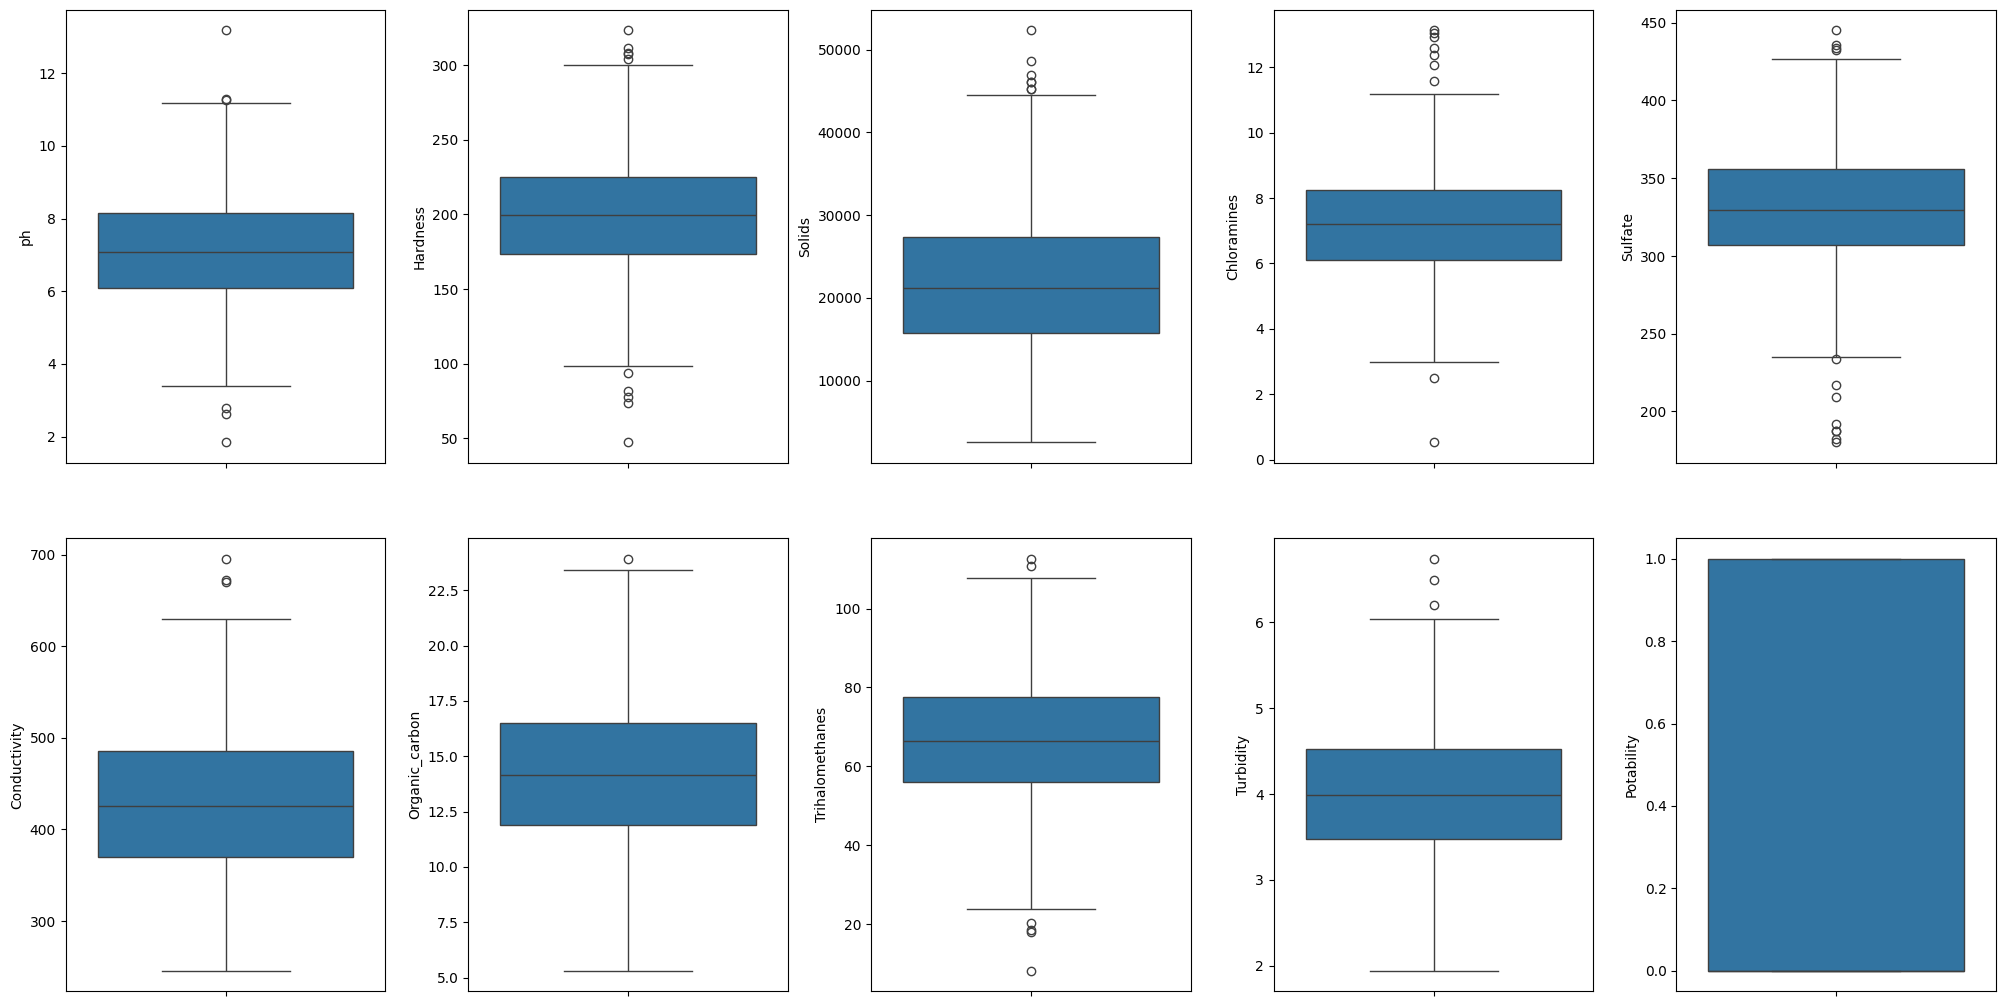

In [51]:
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

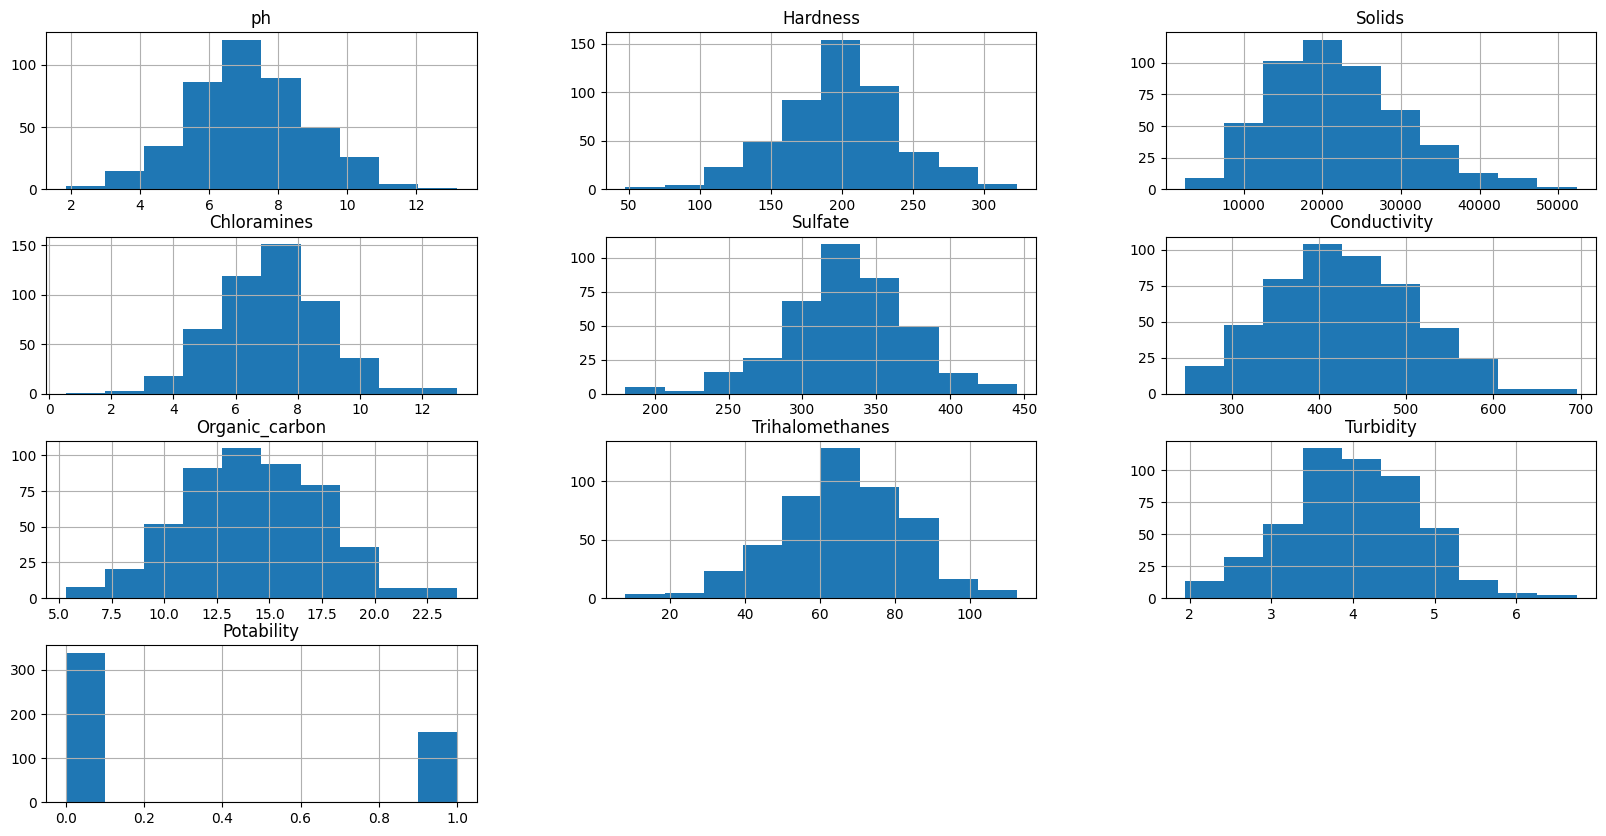

In [52]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

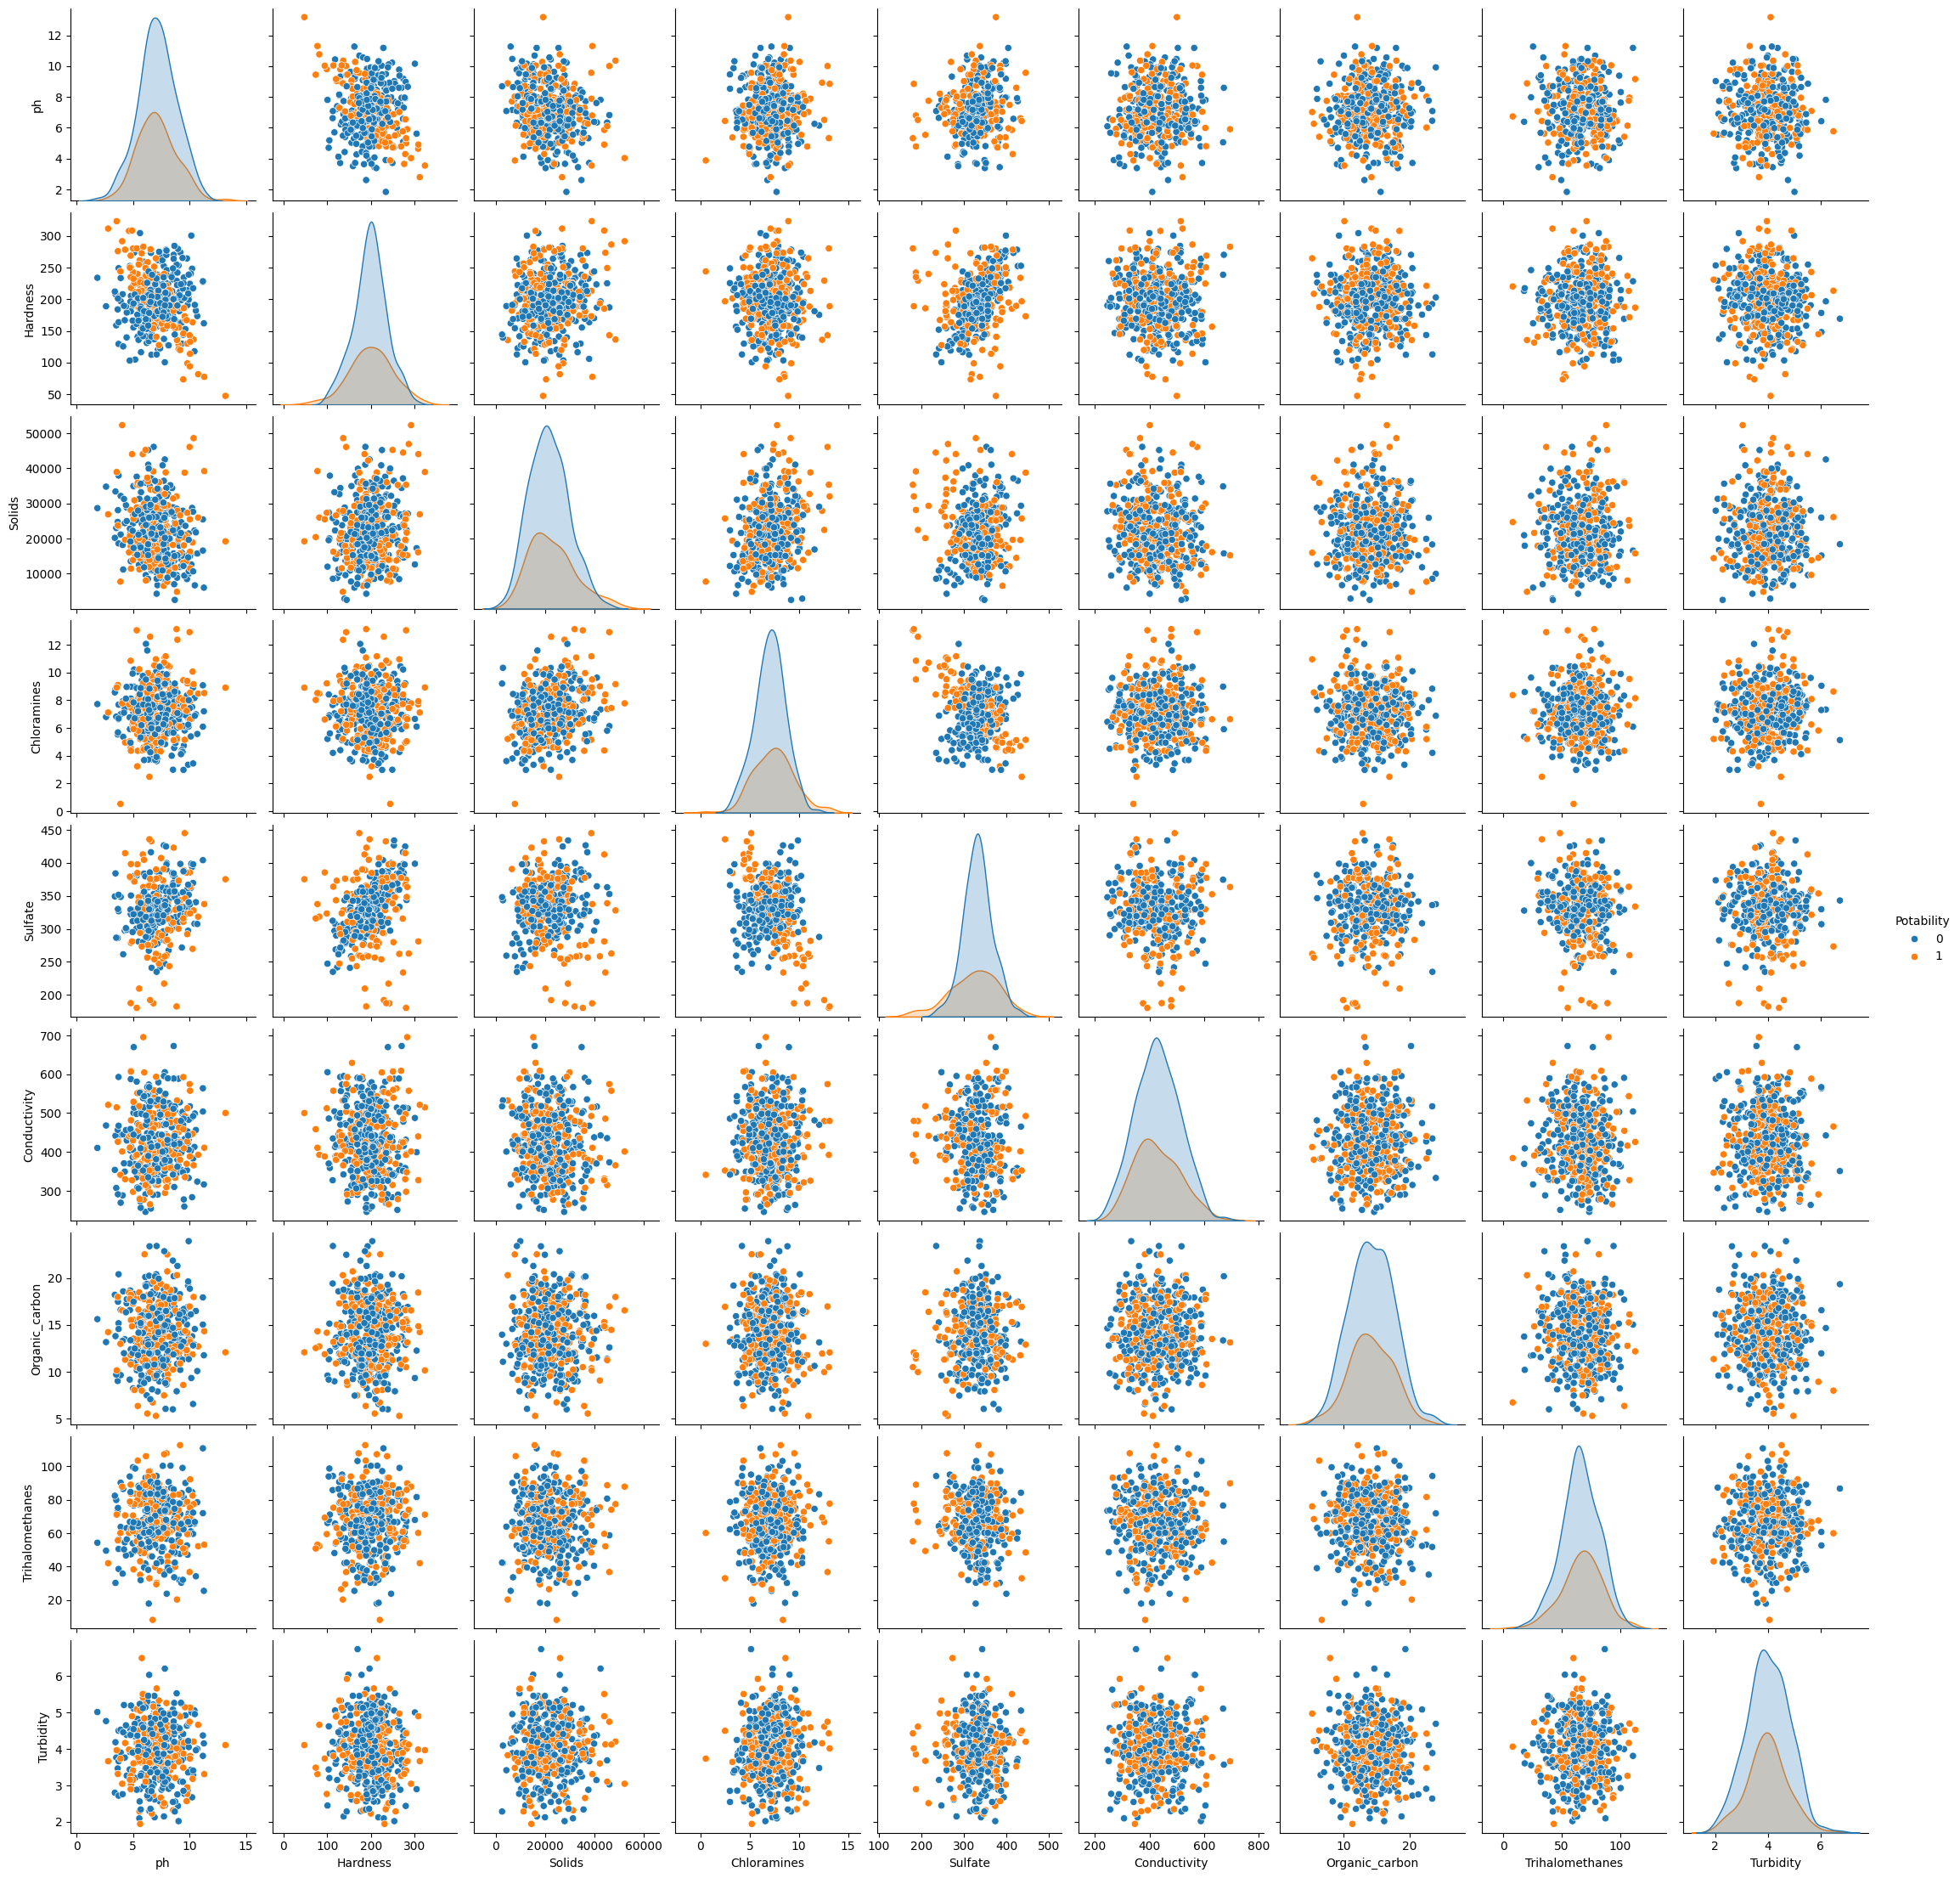

In [53]:
sns.pairplot(df, hue="Potability")

<Axes: xlabel='Potability', ylabel='Density'>

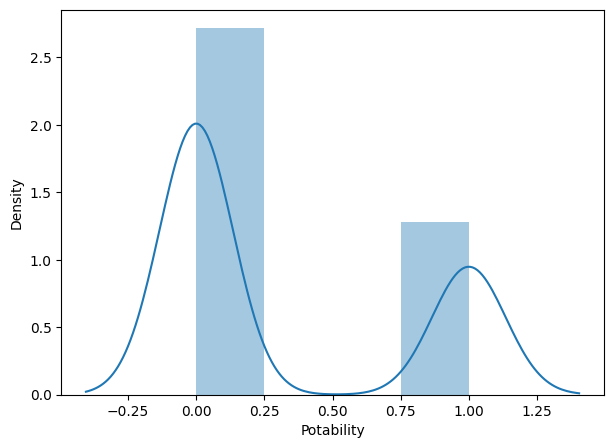

In [54]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

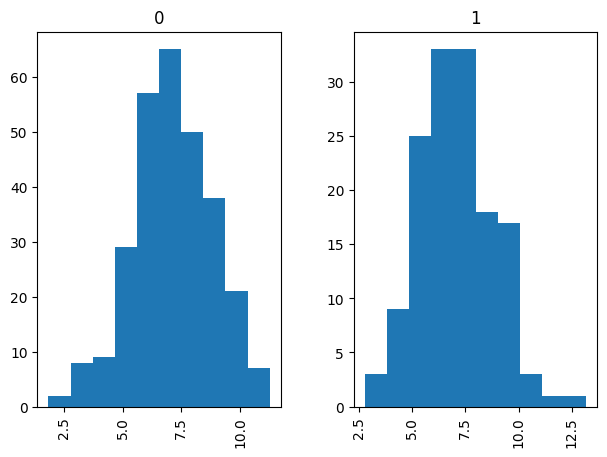

In [55]:
df.hist(column='ph', by='Potability')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

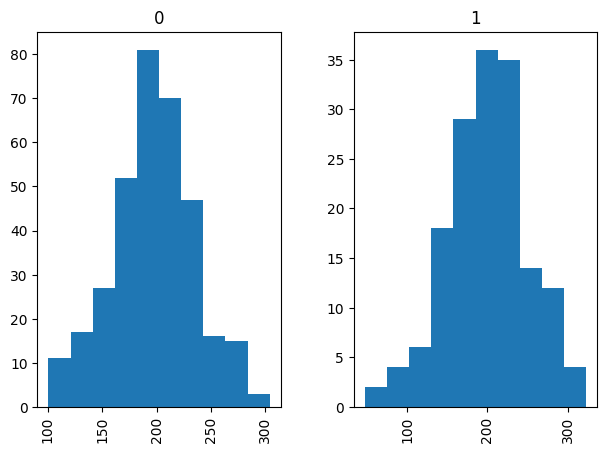

In [56]:
df.hist(column='Hardness', by='Potability')

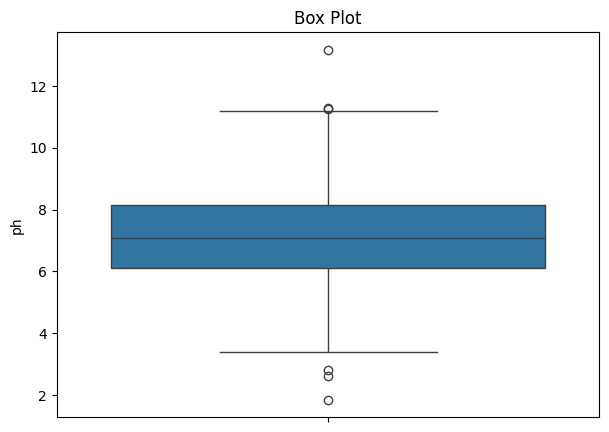

In [57]:
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['ph'])

<Axes: xlabel='Hardness', ylabel='Count'>

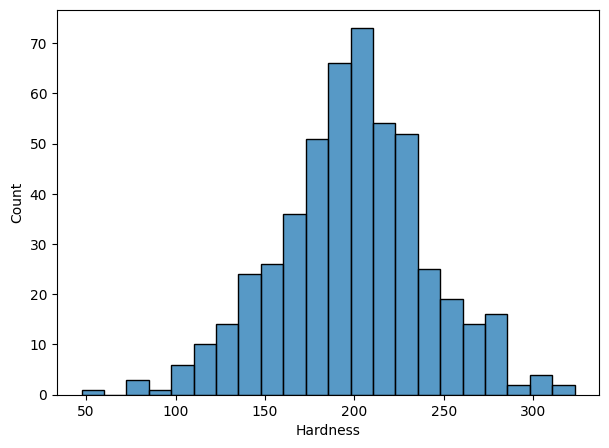

In [58]:
sns.histplot(x = "Hardness", data=df)

In [59]:
df.nunique()

ph                 429
Hardness           499
Solids             499
Chloramines        499
Sulfate            383
Conductivity       499
Organic_carbon     499
Trihalomethanes    476
Turbidity          499
Potability           2
dtype: int64

In [60]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

Potability         0.770907
Solids             0.534919
Conductivity       0.223081
Chloramines        0.141119
ph                 0.070566
Organic_carbon     0.056943
Turbidity          0.056204
Hardness          -0.101591
Trihalomethanes   -0.201395
Sulfate           -0.429757
dtype: float64

* Using pandas skew function to check the correlation between the values.
* Values between 0.5 to  -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

In [61]:
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [62]:
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [63]:
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [64]:
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [65]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [66]:
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

In [67]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

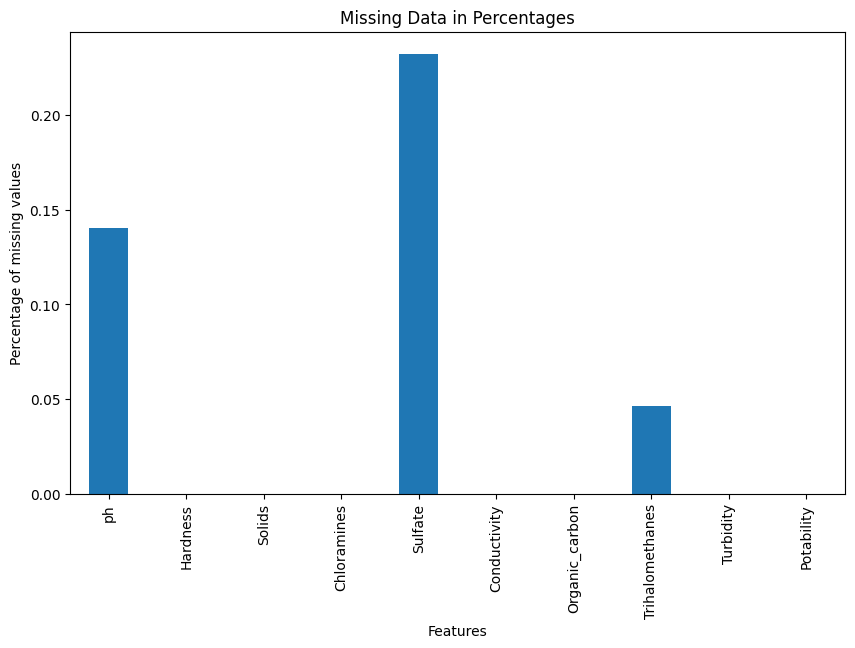

In [68]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [69]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [70]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.131780,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,329.774279,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,329.774279,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: >

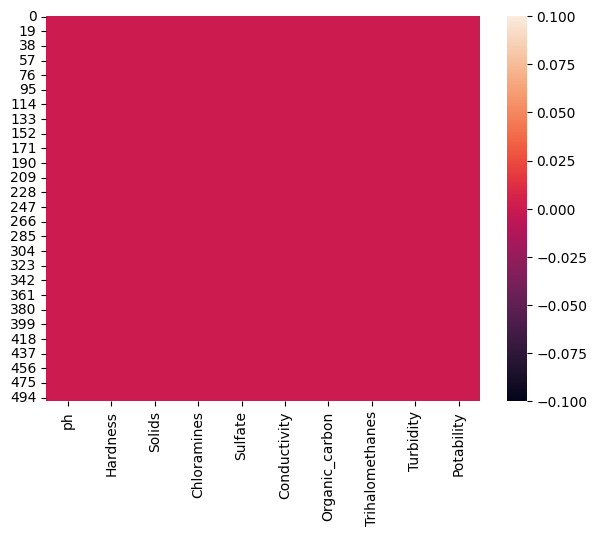

In [71]:
sns.heatmap(df.isnull())

In [72]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [73]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [74]:
X.shape, y.shape

((499, 9), (499,))

In [75]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X = scaler.fit_transform(X)
X

array([[-5.67082148e-16,  1.56097435e-01, -1.51494388e-01, ...,
        -1.15391422e+00,  1.28803886e+00, -1.30706854e+00],
       [-2.18084811e+00, -1.64054108e+00, -4.05274512e-01, ...,
         3.00766964e-01, -6.05557621e-01,  6.40925602e-01],
       [ 6.17627984e-01,  6.16658608e-01, -2.55034648e-01, ...,
         8.12494374e-01,  1.76365211e-02, -1.18949572e+00],
       ...,
       [-7.35157553e-01, -4.06498305e-01, -1.20418768e+00, ...,
        -1.62396409e+00, -3.66105665e-01,  3.19854759e-01],
       [ 3.02765651e-01, -6.22201210e-01, -1.30942603e+00, ...,
        -4.93077224e-01, -8.94908978e-01, -9.52678367e-01],
       [-4.49658902e-01, -4.76303319e-01,  4.59382191e-01, ...,
        -6.70714366e-01, -3.33353143e-01,  2.58235394e+00]])

In [77]:
# import train-test split
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Using Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [80]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [81]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [82]:
# Making Prediction
pred_lg = model_lg.predict(X_test)
print(pred_lg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.7333333333333333


In [84]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       118
           1       1.00      0.06      0.12        47

    accuracy                           0.73       165
   macro avg       0.86      0.53      0.48       165
weighted avg       0.81      0.73      0.64       165



<Axes: >

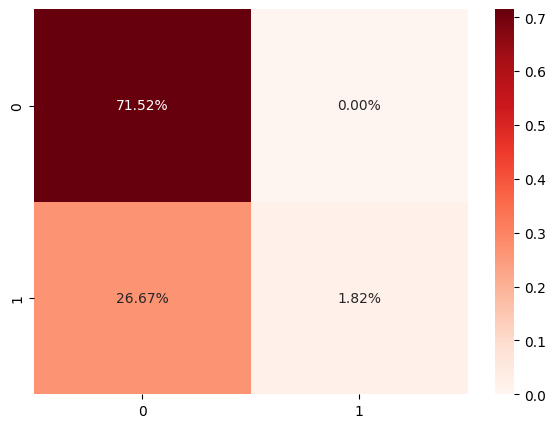

In [85]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [88]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [89]:
# Making Prediction
pred_dt = model_dt.predict(X_test)
print(pred_dt)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]


In [90]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8


In [91]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       118
           1       0.77      0.43      0.55        47

    accuracy                           0.80       165
   macro avg       0.79      0.69      0.71       165
weighted avg       0.80      0.80      0.78       165



<Axes: >

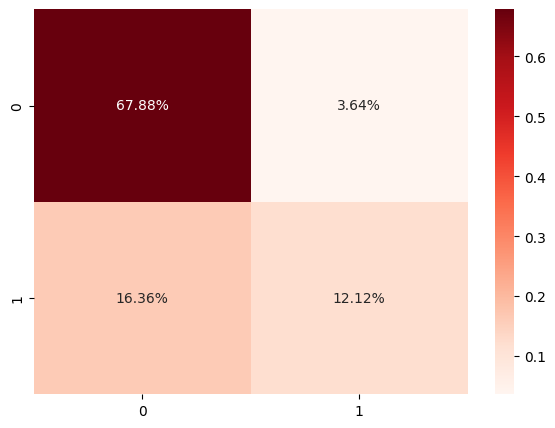

In [92]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [95]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [96]:
# Making Prediction
pred_rf = model_rf.predict(X_test)
print(pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.7151515151515152


In [98]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       118
           1       0.00      0.00      0.00        47

    accuracy                           0.72       165
   macro avg       0.36      0.50      0.42       165
weighted avg       0.51      0.72      0.60       165



<Axes: >

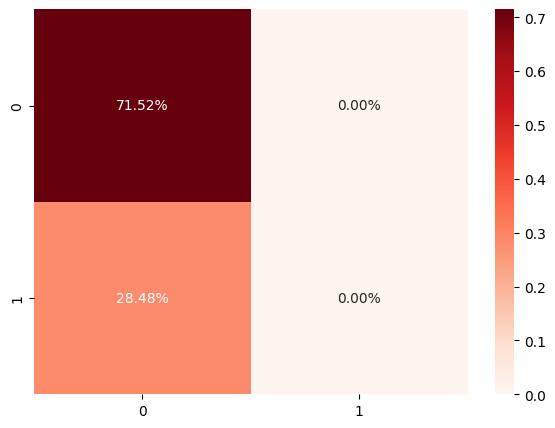

In [99]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using SVM

In [100]:
from sklearn.svm import SVC, LinearSVC

In [101]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [102]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [108]:
# Making Prediction
pred_svm = model_svm.predict(X_test)
print(pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [104]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.8424242424242424


In [105]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       118
           1       0.89      0.51      0.65        47

    accuracy                           0.84       165
   macro avg       0.86      0.74      0.77       165
weighted avg       0.85      0.84      0.83       165



<Axes: >

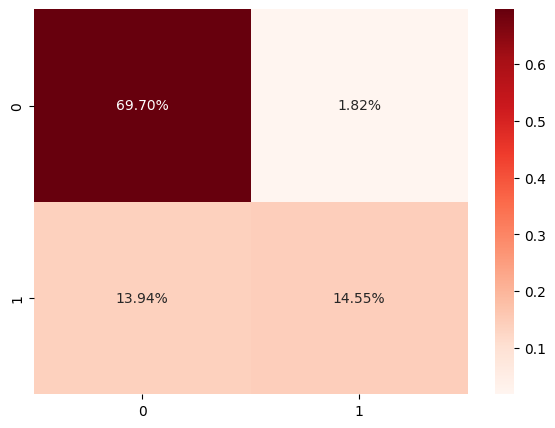

In [106]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
3,SVM,0.842424
1,Decision Tree,0.800000
0,Logistic Regression,0.733333
2,Random Forest,0.715152


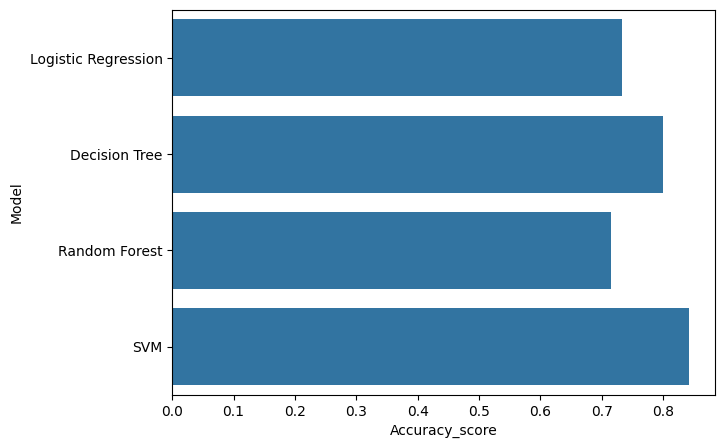

In [107]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM',],
    'Accuracy_score' :[lg, dt, rf, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

#### Conclusion :- Here SVM classifier has achieved highest accuracy.